In [1]:
# Thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import haversine_distances

import plotly.express as px

In [4]:
# Đọc dữ liệu
data =pd.read_excel("/content/vietnamgeo - Final.xlsx")
data

,City,Lat1,Long1
0,An Giang,10.521583,105.125895
1,Thừa Thiên Huế,16.467397,107.590532
2,Kiên Giang,9.824959,105.125895
3,Hải Phòng,20.844911,106.688084
4,Bình Định,13.886021,109.107738
...,...,...,...
58,Thái Bình,20.446347,106.336582
59,Ninh Bình,20.250614,105.974453
60,Nam Định,20.438822,106.162105
61,Yên Bái,21.716768,104.898587


# Mục mới

In [5]:
# Vẽ bản đồ Việt Nam

fig = px.scatter_geo(data, lat='Lat1', lon='Long1', title='Vietnam Geo Map')
fig.show()

In [6]:
# Xác định dữ liệu nào được đưa vào mô hình học máy phân cụm

data_train = data[["Lat1","Long1"]]
data_train

,Lat1,Long1
0,10.521583,105.125895
1,16.467397,107.590532
2,9.824959,105.125895
3,20.844911,106.688084
4,13.886021,109.107738
...,...,...
58,20.446347,106.336582
59,20.250614,105.974453
60,20.438822,106.162105
61,21.716768,104.898587


In [7]:
wscc = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  y_kmeans = model.fit_predict(data_train)
  wscc.append(model.inertia_)

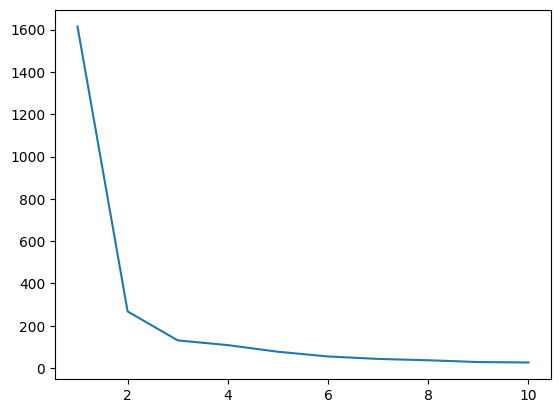

In [8]:
plt.plot(range(1,11),wscc)
plt.xlabel=("Number of cluster")
plt.ylabel=("WCSS")
plt.title=("Elbow method")
plt.show()

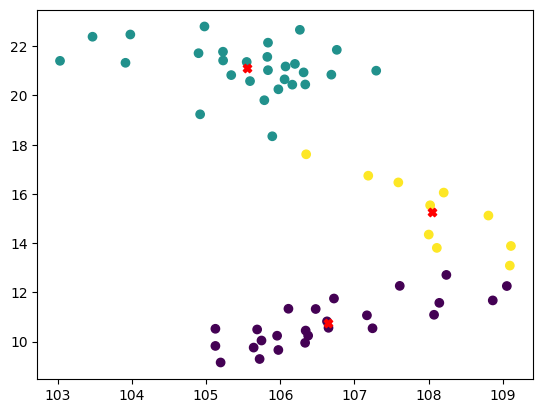

In [9]:
#Chạy thuật toán phân cụm

model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(data_train)
centroids = model.cluster_centers_

# ve data ra

data["y"]=y_kmeans
plt.scatter(data["Long1"],data["Lat1"],c=data["y"])
plt.scatter(centroids[:,1],centroids[:,0],marker="X",color="red")

In [10]:
centroids

array([[ 10.74450159, 106.6482988 ],
       [ 21.13456607, 105.55076996],
       [ 15.2664962 , 108.0460877 ]])